<a href="https://colab.research.google.com/github/leocassiosilva/Analise-de-dados/blob/main/C%C3%B3pia_de_Evento_Data_Science_hands_on.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Request lib para https
import requests

# BS para scraping de HMTL
from bs4 import BeautifulSoup

# Lib para modelagem de dados
import pandas as pd

## **1º Parte do Evento - Web Scraping (18/01)**

In [ ]:
# Carregamento da Pagina

# Link do Site
Site = 'http://www.ssp.sp.gov.br/Estatistica/ViolenciaMulher.aspx'

# Carregando
Pagina = requests.get( Site )

In [ ]:
# Coleanto as infos da pagina
Coleta = BeautifulSoup( Pagina.text, 'html.parser')

In [ ]:
# Acessando titulo
print( Coleta.title )

# Acessar nome dentro das Tags
print( Coleta.title.string )

# Extrair o nome da TAG
print( Coleta.title.name )

<title>
	SSP
</title>

	SSP

title


In [ ]:
# Demo para pegar algumas informações

# Coletando a tag
print( Coleta.a , '\n')

# Coletando o link dentro da Tag
print( Coleta.a.get('href') )

<a href="http://www.saopaulo.sp.gov.br/" target="_blank">Portal do Governo</a> 

http://www.saopaulo.sp.gov.br/


In [ ]:
# Demo para minerar links na pagina

# Loop para extrair os links
for Loop in Coleta.find_all('a'):

  # Pegando o link da Tag
  link = Loop.get('href')

  # Verificando se existe um link externo
  if 'http://' in str(link) :
    print(link)

  else:
    pass

http://www.saopaulo.sp.gov.br/
http://www.policiamilitar.sp.gov.br/
http://www.policiacivil.sp.gov.br/
http://www.policiacientifica.sp.gov.br/
http://www.saopaulo.sp.gov.br/sis/noticias.asp
http://www.poupatempo.sp.gov.br/
http://www.acessasaopaulo.sp.gov.br/
http://www.e-negociospublicos.com.br/
http://www.sap.sp.gov.br/
http://www.agricultura.sp.gov.br/
http://www.desenvolvimentosocial.sp.gov.br/
http://www.casacivil.sp.gov.br/
http://www.casamilitar.sp.gov.br/
http://www.comunicacao.sp.gov.br/
http://www.cultura.sp.gov.br/
http://www.desenvolvimento.sp.gov.br/
http://www.pessoacomdeficiencia.sp.gov.br/
http://www.planejamento.sp.gov.br/
http://www.educacao.sp.gov.br/
http://www.emprego.sp.gov.br/
http://www.ensinosuperior.sp.gov.br/
http://www.sejel.sp.gov.br/
http://www.fazenda.sp.gov.br/
http://www.gestaopublica.sp.gov.br/
http://www.habitacao.sp.gov.br/
http://www.justica.sp.gov.br/
http://www.ambiente.sp.gov.br/
http://www.pge.sp.gov.br/
http://www.relacoesinstitucionais.sp.gov.

In [ ]:
# Minerando uma informação da Pagina
Coleta.find( id='conteudo_repPeriodo_lblPeriodo_2' ).get_text().split()[-3:]

['Novembro', 'de', '2021']

In [ ]:
# Buscar todas as tabelas
Tabelas = Coleta.find_all('table', attrs={'class':'table table-striped table-hover table-condensed'} )

print( 'Total de Tabelas Localizadas:', len(Tabelas) )

Total de Tabelas Localizadas: 123


In [ ]:
# Listas para salvar os dados
Rotulos = []
Dados = []
Periodos = []

# Função para criar uma Data
import datetime
from dateutil.relativedelta import relativedelta

# Ultima data publicada pelo estado
Registro_Inicial = datetime.datetime(2021, 11, 1)

# Variavel de Apoio
Loop = 0

# Loop
for Consulta in Tabelas:

  # Linhas
  Linha = Consulta.find_all('tr')[2]

  # Rotulo da Tabela
  Rotulo = Linha.find_all('td')[0].text

  # Valor da tabela
  Informacao = Linha.find_all('span')[0].text

  # Periodo do loop
  Data = Registro_Inicial - relativedelta( months=Loop )

  # Condição para verificar se é Feminicído
  if Rotulo == 'FEMINICÍDIO':
    Dados.append( Informacao )
    Rotulos.append( Rotulo )
    Periodos.append( Data )

  # Caso contrario, passa
  else:
    pass

  Loop += 1

In [ ]:
# Organizar essas info Dicionairo
Dicionario = {
    'Rotulo' : Rotulos,
    'Quantidade' : Dados,
    'Periodo' : Periodos
}

# Criar o DataFame
Base_Dados = pd.DataFrame( Dicionario )

# Exportar os dados para Excel
# Base_Dados.to_excel('Base_Dados - Feminicidio.xlsx', index=False )

Base_Dados.shape

(47, 3)

## **2º Parte do Evento - Data Visualization (19/01)**

In [ ]:
# Verificandoo
Base_Dados.head()

,Rotulo,Quantidade,Periodo
0,FEMINICÍDIO,9,2021-11-01
1,FEMINICÍDIO,9,2021-10-01
2,FEMINICÍDIO,6,2021-09-01
3,FEMINICÍDIO,8,2021-08-01
4,FEMINICÍDIO,8,2021-07-01


In [ ]:
# Verificando
Base_Dados.tail()

,Rotulo,Quantidade,Periodo
42,FEMINICÍDIO,16,2018-05-01
43,FEMINICÍDIO,14,2018-04-01
44,FEMINICÍDIO,8,2018-03-01
45,FEMINICÍDIO,8,2018-02-01
46,FEMINICÍDIO,5,2018-01-01


In [ ]:
# Libs para analise gráficas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Caso nao tenha na maquina
#pip install matplotlib, seaborn, plotly

In [ ]:
# Campos Nulos
Base_Dados.isnull().sum()

Rotulo        0
Quantidade    0
Periodo       0
dtype: int64

In [ ]:
# Analisar o tipo da informação
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Rotulo      47 non-null     object        
 1   Quantidade  47 non-null     object        
 2   Periodo     47 non-null     datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.2+ KB


In [ ]:
# Converter esse campo para numerico
Base_Dados['Quantidade'] = pd.to_numeric( Base_Dados['Quantidade'] )

Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Rotulo      47 non-null     object        
 1   Quantidade  47 non-null     int64         
 2   Periodo     47 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.2+ KB


In [ ]:
# Analises Estatisticas
Base_Dados.describe()

,Quantidade
count,47.000000
mean,13.297872
std,5.384821
min,5.000000
25%,9.000000
50%,13.000000
75%,17.000000
max,27.000000


In [ ]:
# Incluir a data como index
Dados = Base_Dados.set_index('Periodo')

Dados.head()

,Rotulo,Quantidade
Periodo,,
2021-11-01,FEMINICÍDIO,9
2021-10-01,FEMINICÍDIO,9
2021-09-01,FEMINICÍDIO,6
2021-08-01,FEMINICÍDIO,8
2021-07-01,FEMINICÍDIO,8


In [ ]:
# Retirando a coluna
Dados.drop( columns='Rotulo', inplace=True )

Dados.head()

,Quantidade
Periodo,
2021-11-01,9
2021-10-01,9
2021-09-01,6
2021-08-01,8
2021-07-01,8


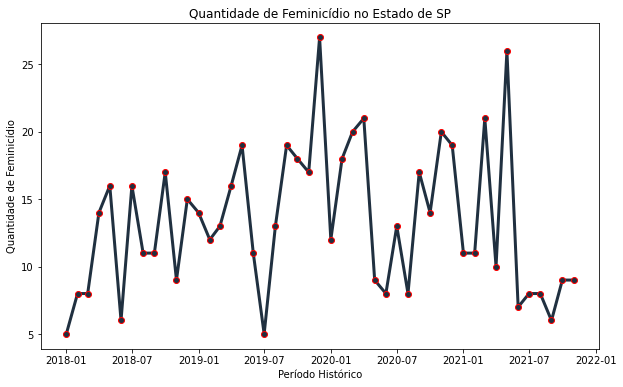

In [ ]:
# --- Matplot - Linhas

# Tamanho da imagem
plt.figure( figsize=(10, 6) )

# Titulo
plt.title('Quantidade de Feminicídio no Estado de SP')

# Labels
plt.xlabel('Período Histórico')
plt.ylabel('Quantidade de Feminicídio')

plt.plot( Dados, color='#203040', linewidth=3, marker='o', markeredgecolor='red' );

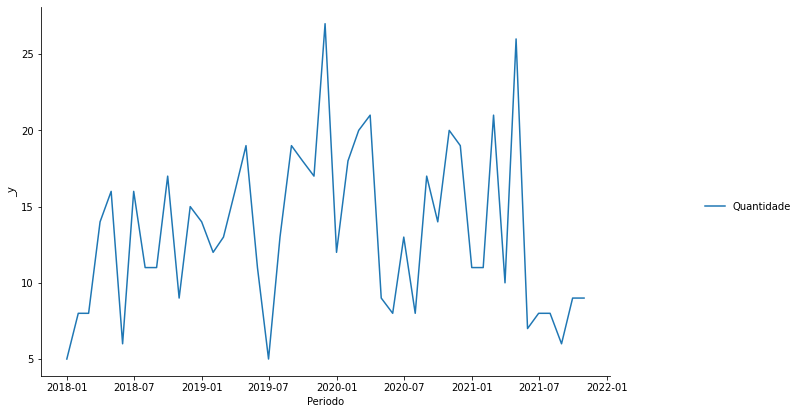

In [ ]:
# --- Seaborn - Linhas
# Plot do Seabron de linhas
sns.relplot( data=Dados, kind='line' )

# Ajuste do Tamanho
plt.gcf().set_size_inches(12, 6)

In [ ]:
# --- Plotly - Linhas
px.line( Dados, y='Quantidade', x=Dados.index, width=700, height=500 )

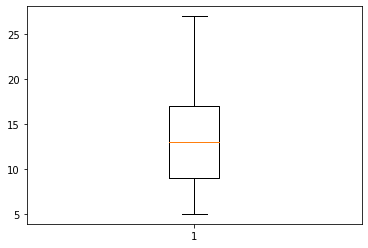

In [ ]:
# Matplotlib - Boxplot
plt.boxplot( x=Dados['Quantidade'] );

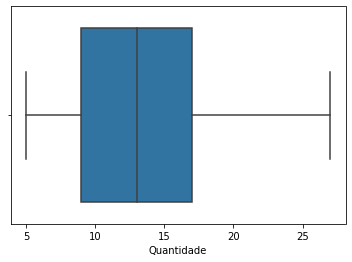

In [ ]:
# Seaborn - Boxplot
sns.boxplot( x=Dados['Quantidade'] );

In [ ]:
# Plotly - Boxplot
px.box( Dados, y='Quantidade', width=500 )

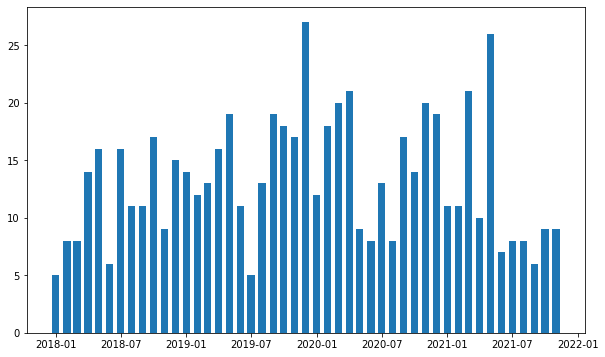

In [ ]:
# Matplot - Barras
plt.figure( figsize=(10, 6) )
plt.bar( Dados.index, Dados['Quantidade'], width=20 );

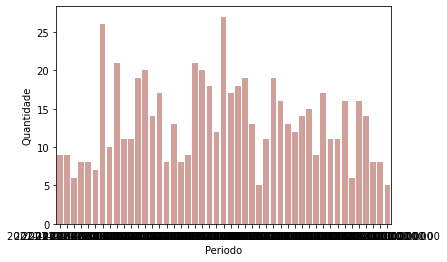

In [ ]:
# Seaborn - Barras
sns.barplot( x=Dados.index, y='Quantidade', data=Dados, color='salmon', saturation=0.4 );

In [ ]:
# plotly - Barras
px.bar( Dados, x=Dados.index, y='Quantidade' )

In [ ]:
# Media movel a cada Trimestre
Dados.sort_index( inplace=True )

In [ ]:
# Gerando a média movel
Dados['Média Movel'] = Dados.rolling(3).mean()

Dados.head()

,Quantidade,Média Movel
Periodo,,
2018-01-01,5,NaN
2018-02-01,8,NaN
2018-03-01,8,7.000000
2018-04-01,14,10.000000
2018-05-01,16,12.666667


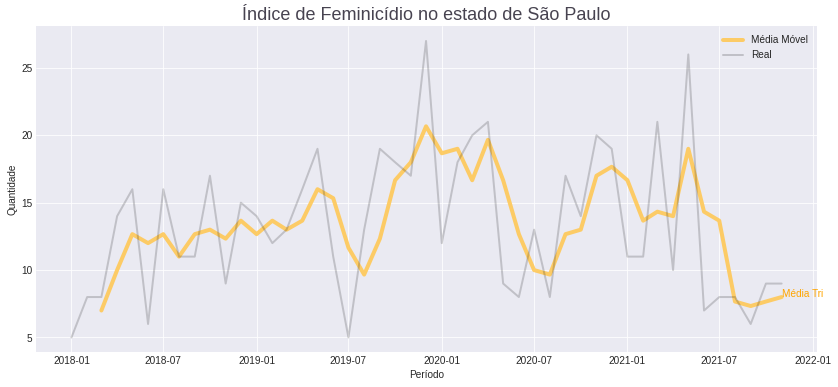

In [ ]:
# Alterar o style do matplot
plt.style.use('seaborn-darkgrid')

# Alterar tamhho
plt.figure( figsize=(14, 6) )

# Plotar media movel
plt.plot( Dados.index, Dados['Média Movel'], linewidth=4, alpha=0.9, color='#ffc857' )
# Incluir no nome da linha
plt.text( Dados.index[-1], Dados['Média Movel'].tail(1), 'Média Tri', color='orange' )

# plotar o valor real
plt.plot( Dados.index, Dados['Quantidade'], linewidth=2, alpha=0.2, color='#1c1c1c' )

# Labels
plt.xlabel('Período')
plt.ylabel('Quantidade')

# LEgenda
plt.legend( ['Média Móvel', 'Real'] )

# titulo
plt.title('Índice de Feminicídio no estado de São Paulo', loc='center', fontsize=18, color='#474350' );